In [4]:
import torch
import matplotlib.pyplot as plt

In [6]:
# reading the data
words = open("./data/names.txt", "r").read().splitlines()

# Exploring
print(f"first 10 words{words[:10]}")
print(f"length of words: {len(words)}")
print(f"min word length {min(len(w) for (w) in words)} and max word length {max(len(w) for (w) in words)}")

first 10 words['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
length of words: 32033
min word length 2 and max word length 15


In [13]:
##BIGRAM DICTIONARY

#Bigram works with 2 words/characters at a time.
#It uses the previous word/charachter to predict the next word/character. 

In [49]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = ch1, ch2
        b[bigram] = b.get(bigram, 0) + 1

In [50]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [56]:
sorted(b.items(), key=lambda kv: -kv[1])
# return the tuples of key -value
# keys are character bigrams, values are count

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [57]:
## 2- Bigram 2D Tensor

In [74]:
N = torch.zeros(27, 27, dtype = torch.int32)

In [75]:
# make a list of characters (a -> z)
chars = sorted(list(set("".join(words))))

# make a dictionary of character to index
stoi = {ch: i + 1 for (i, ch) in enumerate(chars)}
# 🆕 set start and end tokens to 0
stoi["."] = 0

# make a dictionary of index to character
itos = {i: ch for (ch, i) in stoi.items()}

In [76]:
# getting the Bigrams
for w in words:
    # add start and end tokens
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

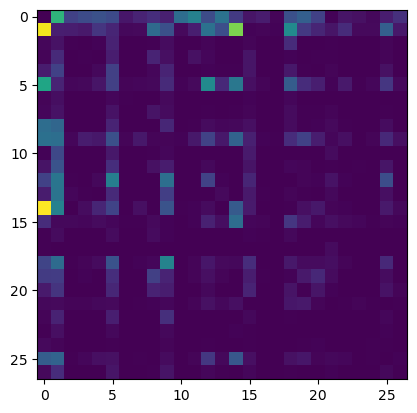

In [77]:
# visualize this matrix
plt.imshow(N)

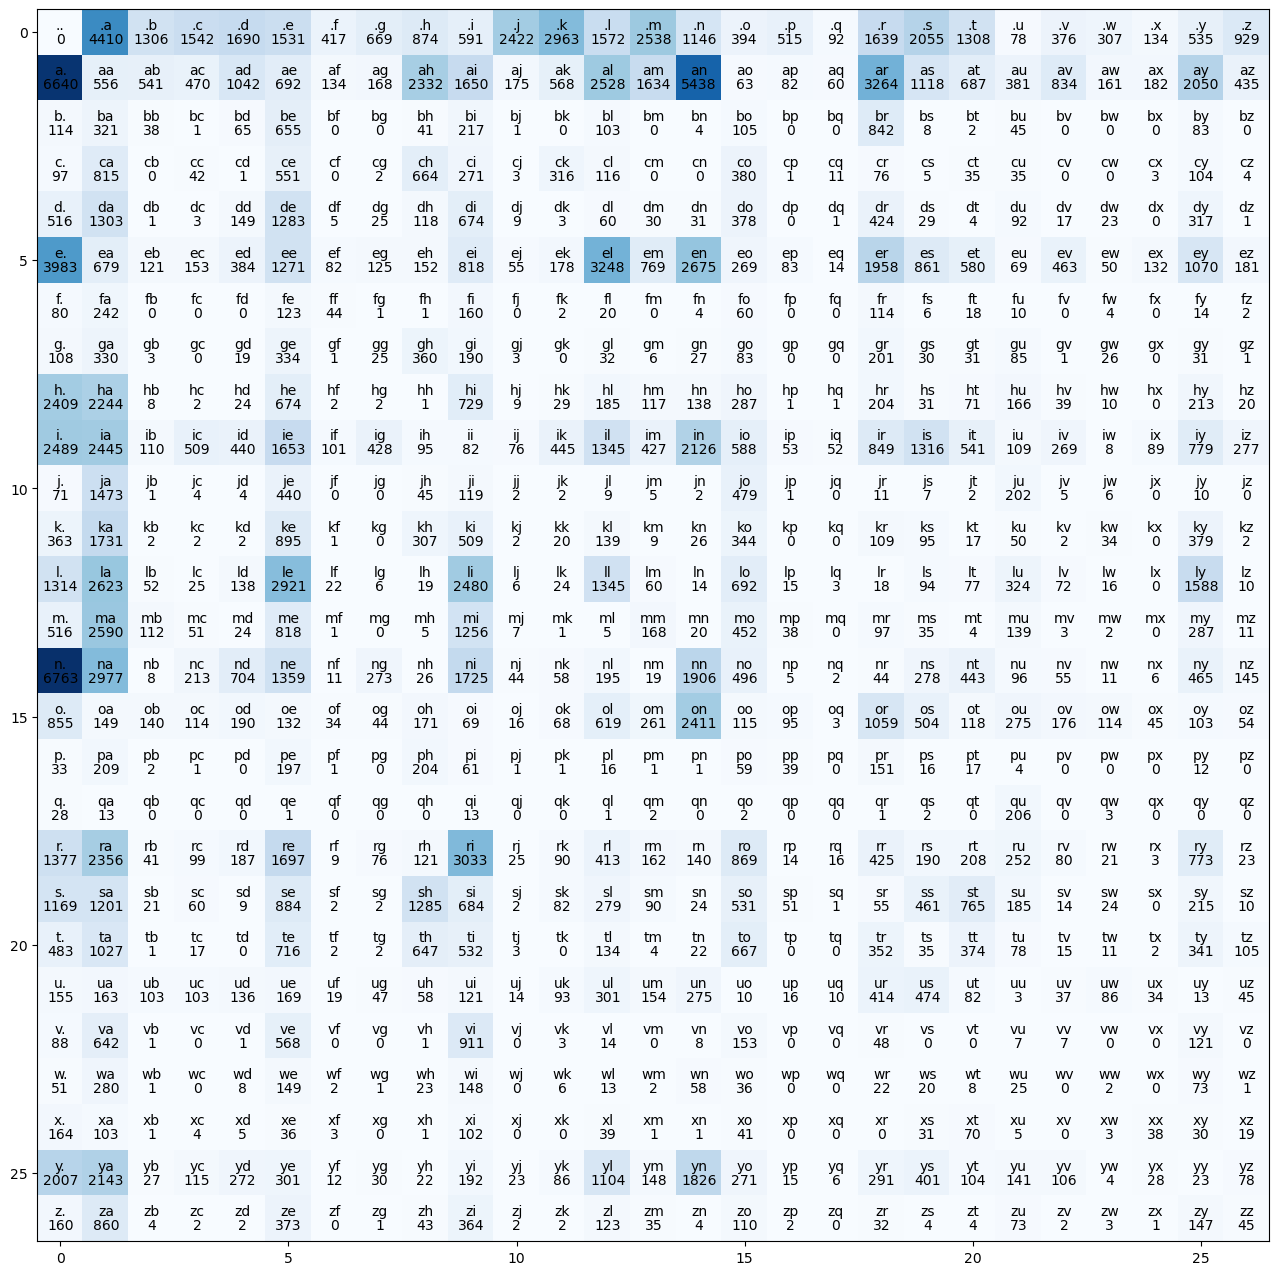

In [78]:
# visualize this matrix
plt.figure(figsize = (16, 16))
plt.imshow(N, cmap = "Blues")
for i in range(27):
    for j in range(27):
        # character strings
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "black")
        # bigram counts (.item() converts tensor to int)
        plt.text(j, i, N[i, j].item(), ha = "center", va = "top", color = "black")
plt.show()

In [79]:
## 3- Sampling from the model

In [139]:
# probability of the first character
p = N[0].float()
p = p / p.sum()


In [140]:
# generator is a seed for reproducibility ~ (random number generator) 
g = torch.Generator().manual_seed(2147483647)

In [141]:
# sample from the p distribution using the generator 
ix = torch.multinomial(p, num_samples = 1 , replacement = True, generator = g).item()
itos[ix]

'j'

In [149]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [150]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [151]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [143]:
### 3.1- Vectorization of probabilities

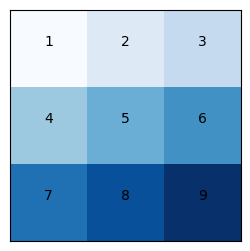

In [145]:
x = torch.tensor([[1,2,3],[4,5,6], [7,8,9]])
# visualize this matrix
plt.figure(figsize = (3, 3))
plt.imshow(x, cmap = "Blues")
for i in range(3):
    for j in range(3):
        # character strings
        chstr = x[i, j].item()
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "black")
        plt.xticks([])
        plt.yticks([])

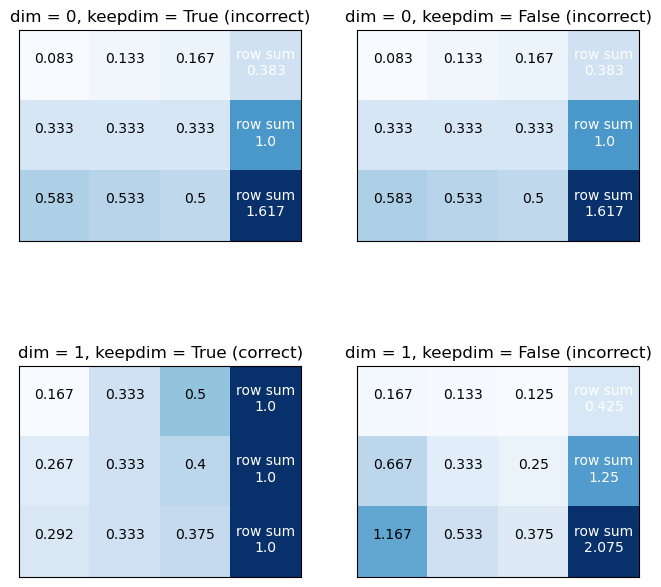

In [146]:
# visualize this matrix
x = torch.tensor([[1,2,3],[4,5,6], [7,8,9]])
xs = [
    torch.cat([(x / x.sum(dim = 0, keepdim = True)), (x / x.sum(dim = 0, keepdim = True)).sum(dim = 1, keepdim = True)], dim = 1), # normalize by column ➡️ incorrect ❌
    torch.cat([(x / x.sum(dim = 0, keepdim = False)), (x / x.sum(dim = 0, keepdim = False)).sum(dim = 1, keepdim = True)], dim = 1), # normalize by column ➡️ incorrect ❌
    torch.cat([(x / x.sum(dim = 1, keepdim = True)), (x / x.sum(dim = 1, keepdim = True)).sum(dim = 1, keepdim = True)], dim = 1), # normalize by row ➡️ correct (sum of each row == 1)✅
    torch.cat([(x / x.sum(dim = 1, keepdim = False)), (x / x.sum(dim = 1, keepdim = False)).sum(dim = 1, keepdim = True)], dim = 1) # normalize by column  ➡️ incorrect ❌
    ]

# visualize this matrices
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
for n in range(4):
    axes[n // 2, n % 2].imshow(xs[n], cmap = "Blues")
    for i in range(3):
        for j in range(4):
            chstr = xs[n][i, j].item()
            if j == 3:
                axes[n // 2, n % 2].text(j, i - 0.25, f"row sum\n{round(chstr, 3)}", ha = "center", va = "top", color = "white")
            else:
                axes[n // 2, n % 2].text(j, i, round(chstr, 3), ha = "center", va = "bottom", color = "black")
            if n // 2 == 0 or not(n % 2 == 0):
                axes[n // 2, n % 2].set_title(f"dim = {n // 2}, keepdim = {not bool(n % 2)} (incorrect)")
            else:
                axes[n // 2, n % 2].set_title(f"dim = {n // 2}, keepdim = {not bool(n % 2)} (correct)")

            # remove ticks
            axes[n // 2, n % 2].set_xticks([])
            axes[n // 2, n % 2].set_yticks([])

In [163]:
#Wrong boradcasting Example:

P = N.float() / N.sum(dim = 1, keepdim = False)
# Broadcasting:
# N.sum(dim = 1) ➡️ (27) ➡️ (1, 27) it became a row vector ❌
# N.float() ➡️ (27, 27)
# P ➡️ (27, 27)
# Wrong ❌ sum of each row != 1

In [164]:
P = N.float() / N.sum(dim = 1, keepdim = True)
# Broadcasting:
# N.sum(dim = 1, keepdim = True) ➡️ (27, 1)
# N.float() ➡️ (27, 27)
# P ➡️ (27, 27)
# Correct ✅ sum of each row == 1

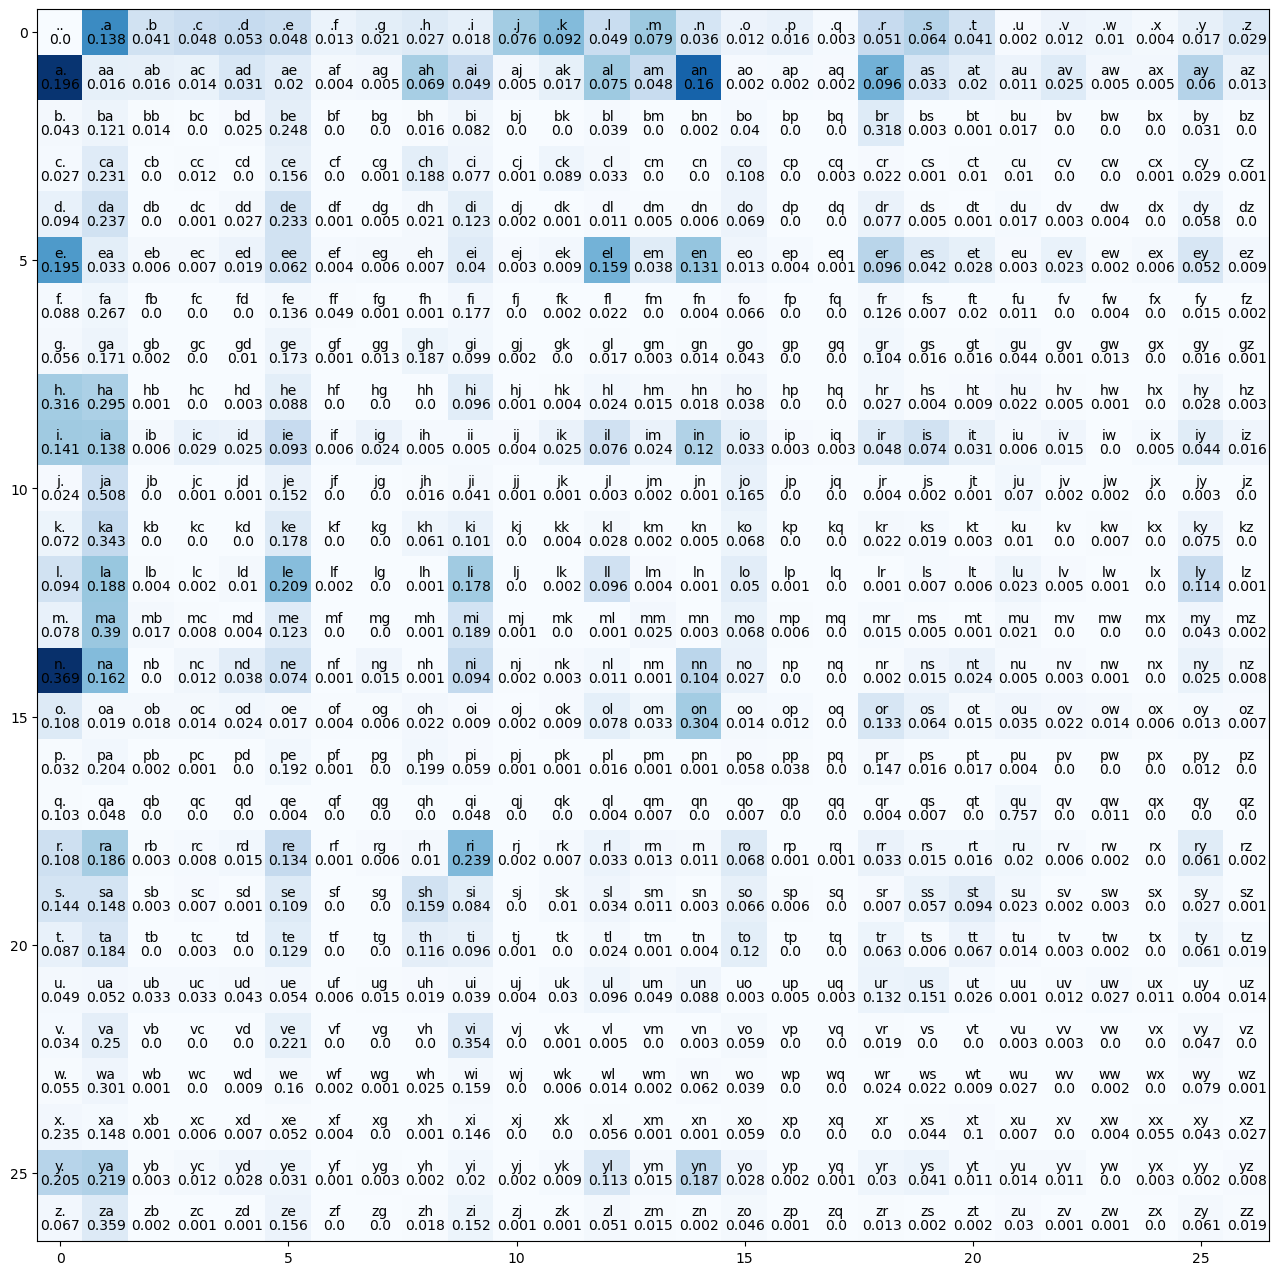

In [165]:
# visualize this probability matrix, it matches the bigram matrix
plt.figure(figsize = (16, 16))
plt.imshow(N, cmap = "Blues")
for i in range(27):
    for j in range(27):
        # character strings
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "black")
        # bigram counts (.item() converts tensor to int)
        plt.text(j, i, round(P[i, j].item(),3), ha = "center", va = "top", color = "black")
plt.show()

In [166]:
# sample from P
names = []
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1 , replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    names.append("".join(out))
print(names)

['junide.', 'janasah.', 'p.', 'cony.', 'a.', 'nn.', 'kohin.', 'tolian.', 'juee.', 'ksahnaauranilevias.']


In [167]:
## Training Loss: NLL

In [168]:
# getting the Bigrams
for w in words[:3]:
    # add start and end tokens
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # probability of each bigram
        # should be 1/27 = 0.037 for a uniform distribution i.e., random guessing
        prob = P[ix1, ix2]
        print(f"{ch1}{ch2} -> {prob:.4f}")

.e -> 0.0478
em -> 0.0377
mm -> 0.0253
ma -> 0.3899
a. -> 0.1960
.o -> 0.0123
ol -> 0.0780
li -> 0.1777
iv -> 0.0152
vi -> 0.3541
ia -> 0.1381
a. -> 0.1960
.a -> 0.1377
av -> 0.0246
va -> 0.2495
a. -> 0.1960


In [ ]:
#we need a single number to combine all of these probabilities and measure the quality of the model ➡️ Maximum Likelihood Estimation
#so, the product of all probabilities == the sum of log of all probabilities ➡️ should be as high as possible

In [169]:
# for smoothing (to prevent zero probabilities = log(0) = -inf)
P = (N+1).float() / N.sum(dim = 1, keepdim = True)

In [170]:
def nll_loss(input_list, verbose = False):
    log_likelihood = 0.0
    n = 0
    for w in input_list:
        # add start and end tokens
        chs = ["."] + list(w) + ["."]
        for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            # probability of each bigram
            # should be 1/27 = 0.037 for a uniform distribution i.e., random guessing
            prob = P[ix1, ix2]
            logprob = torch.log(prob)
            log_likelihood += logprob
            n += 1
            # higher the log probability (closer to 0) is better
            if verbose:
                print(f"{ch1}{ch2} -> {prob:.4f} {logprob:.4f}")

    # higher the log likelihood (closer to 0) is better
    print(f"log Likelihood: {log_likelihood}")

    # but in loss function lower is better, so we negate it
    nll = -log_likelihood
    print(f"Negative log likelihood: {nll}")

    # normalize it
    print(f"Normalized Negative log Likelihood: {(nll / n)}") # we need to minimize this

nll_loss(words[:5], verbose = True)

.e -> 0.0478 -3.0402
em -> 0.0377 -3.2780
mm -> 0.0254 -3.6713
ma -> 0.3901 -0.9414
a. -> 0.1960 -1.6297
.o -> 0.0123 -4.3956
ol -> 0.0781 -2.5492
li -> 0.1777 -1.7274
iv -> 0.0153 -4.1830
vi -> 0.3545 -1.0372
ia -> 0.1382 -1.9792
a. -> 0.1960 -1.6297
.a -> 0.1377 -1.9827
av -> 0.0246 -3.7033
va -> 0.2499 -1.3867
a. -> 0.1960 -1.6297
.i -> 0.0185 -3.9910
is -> 0.0744 -2.5983
sa -> 0.1483 -1.9086
ab -> 0.0160 -4.1355
be -> 0.2480 -1.3943
el -> 0.1591 -1.8383
ll -> 0.0964 -2.3389
la -> 0.1880 -1.6714
a. -> 0.1960 -1.6297
.s -> 0.0642 -2.7460
so -> 0.0656 -2.7237
op -> 0.0121 -4.4146
ph -> 0.1998 -1.6104
hi -> 0.0959 -2.3450
ia -> 0.1382 -1.9792
a. -> 0.1960 -1.6297
log Likelihood: -77.71862030029297
Negative log likelihood: 77.71862030029297
Normalized Negative log Likelihood: 2.4287068843841553


In [171]:
# check the loss of the sample names
nll_loss(names)

log Likelihood: -256.8978576660156
Negative log likelihood: 256.8978576660156
Normalized Negative log Likelihood: 3.471592664718628


In [172]:
#MLP approach

In [173]:
#1- Training set of bigrams (x,y)

In [174]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc
xenc.shape

torch.Size([5, 27])

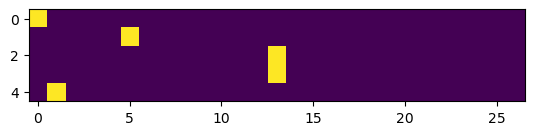

In [175]:
plt.imshow(xenc)

In [176]:
#Define network
### 3.1- one output neuron ➡️ single outputs for each example

In [182]:
W = torch.randn(27,27)

xenc @ W

tensor([[ 0.1048,  2.0460, -1.3960, -0.1394, -0.7011,  0.2797,  0.5196,  0.7519,
         -1.8289,  0.1800, -0.3409, -0.5192,  1.1343, -1.3826,  0.9350,  1.3693,
         -0.5855,  0.6690, -2.2660,  1.1338,  0.4836,  0.3443,  0.7282,  0.5416,
          0.0405, -0.6860,  0.5842],
        [-0.6881,  1.0276,  0.1497,  1.1282,  0.1749,  1.0548,  0.8182, -3.4176,
         -0.7469,  1.1434, -1.9013,  0.1216,  0.0723,  0.4568,  0.4153,  1.1770,
         -0.6690, -1.6330,  0.7267, -0.5203, -0.1854, -0.4161,  0.3237, -0.7208,
         -2.0691,  0.3179, -1.6780],
        [-0.2004,  2.0658, -0.9196,  0.7495, -0.6645,  3.3285, -1.0284, -0.5104,
         -1.5926, -1.4714,  0.5588,  0.4095,  2.0610,  1.5442, -0.2716,  0.3637,
         -1.9496,  1.1503,  0.4363,  0.3688, -0.3336,  1.7053, -0.9535, -1.2419,
          0.3754,  0.1005, -1.1960],
        [-0.2004,  2.0658, -0.9196,  0.7495, -0.6645,  3.3285, -1.0284, -0.5104,
         -1.5926, -1.4714,  0.5588,  0.4095,  2.0610,  1.5442, -0.2716,  0.3637

In [183]:
(xenc @ W).shape

torch.Size([5, 27])

In [180]:
#(5, 27) @ (27,27) -> (5, 27)

In [ ]:
##Gradient Descent

In [206]:
# log-counts
logits = xenc @ W 
# equivalent N
counts = logits.exp() 

# convert them into probabilities
probs = counts / counts.sum(1, keepdims=True)
probs

# probs = F.softmax(logits, dim = 1)

loss =- probs[torch.arange(5), ys[:5]].log().mean()

In [207]:
probs[0]

tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])

In [208]:
probs[0].sum()

tensor(1.0000)

In [209]:
loss.item()

3.7693049907684326

In [190]:
# SUMMARY ------------------------------>>>>

In [191]:
xs

tensor([ 0,  5, 13, 13,  1])

In [192]:
ys

tensor([ 5, 13, 13,  1,  0])

In [193]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [194]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [195]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [215]:
# !!! OPTIMIZATION 

In [216]:
xs

tensor([ 0,  5, 13, 13,  1])

In [217]:
ys

tensor([ 5, 13, 13,  1,  0])

In [226]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [227]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [228]:
loss.item()

3.7693049907684326

In [229]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [230]:
W.data += -0.1 * W.grad

In [231]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [232]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.7686190605163574


In [233]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

juwjdjdjancqydjufhqyywecnw.
.
oiin.
toziasz.
twt.
